# Plotting UMAP of Diagnosis
## Anna Lapteva
### April 4, 2024

UMAP plots were created using the [UMAP documentation](https://umap-learn.readthedocs.io/en/latest/index.html). The data was tidied in "20440_project_data_cleanup.ipynb" to be compatible with this dimension reduction technique. Let's perform the relevant imports for creating our plot.

In [1]:
# Data handling
import pandas as pd
import numpy as np

# Statistical/ML tools
import umap
from sklearn.preprocessing import StandardScaler

# Plotting tools
import umap.plot
import matplotlib.pyplot as plt
import seaborn as sns

Let's also upload our dataset.

In [2]:
# Upload our data
relative_abundances = pd.read_csv("../Data/20440_cleaned_data.csv")

# Take a look!
relative_abundances.head()

,Alistipes,Bacteroides,Bifidobacterium,Butyricicoccus,Clostridium,Dorea,Eggerthella,Faecalibacterium,Gemmiger,Prevotella,...,Trichococcus,Anaerococcus,Caulobacter,Elizabethkingia,Flavobacterium,Methylobacterium,Burkholderia,Anoxybacillus,Epulopiscium,Robinsoniella
0,2.481730,9.75944,0.730816,1.720460,1.53776,0.685140,0.548112,3.593180,1.294150,47.2442,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.556370,10.32600,2.478230,1.428890,17.60440,0.580487,0.000000,2.433580,1.038180,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,50.02380,0.665589,1.179040,12.19930,0.817724,0.000000,0.950841,1.255110,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.206700,15.85570,0.531984,1.621900,6.20215,1.621900,0.402232,18.165300,0.000000,15.2978,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.650566,40.53110,3.564740,0.828803,9.01880,2.094290,0.000000,1.969520,0.516888,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In order to be able to use UMAP dimensionality reduction, I will further reshape the data. I will extract the columns without the diagnosis as those reflect all of the measurements. For ensuring consistency, I will also convert each feature into a z-score.

In [3]:
# Get measurement data
measurements = list(relative_abundances.columns)
measurements.remove("Diagnosis")
abundance_data = relative_abundances[
        measurements
].values

# Get z-scores
scaled_data = StandardScaler().fit_transform(abundance_data)

# Take a look again
scaled_data

array([[-0.2797434 , -0.27472123, -0.4945345 , ..., -0.05050763,
        -0.05050763, -0.05050763],
       [-0.27107506, -0.24002676, -0.36466148, ..., -0.05050763,
        -0.05050763, -0.05050763],
       [-0.56796016,  2.19095009, -0.49938237, ..., -0.05050763,
        -0.05050763, -0.05050763],
       ...,
       [-0.56796016, -0.8561509 , -0.54885093, ..., -0.05050763,
        19.79898987, -0.05050763],
       [-0.56796016, -0.85070496, -0.31938763, ..., -0.05050763,
        -0.05050763, 19.79898987],
       [-0.5571156 , -0.48404055, -0.14095746, ..., -0.05050763,
        -0.05050763, -0.05050763]])

Let's now fit a UMAP model to the data.

In [4]:
# Initialize UMAP object
mapper = umap.UMAP()

# Use fit_transform to get reduced data
embedding = mapper.fit_transform(scaled_data)

We can now plot the points, coloring by label provided!

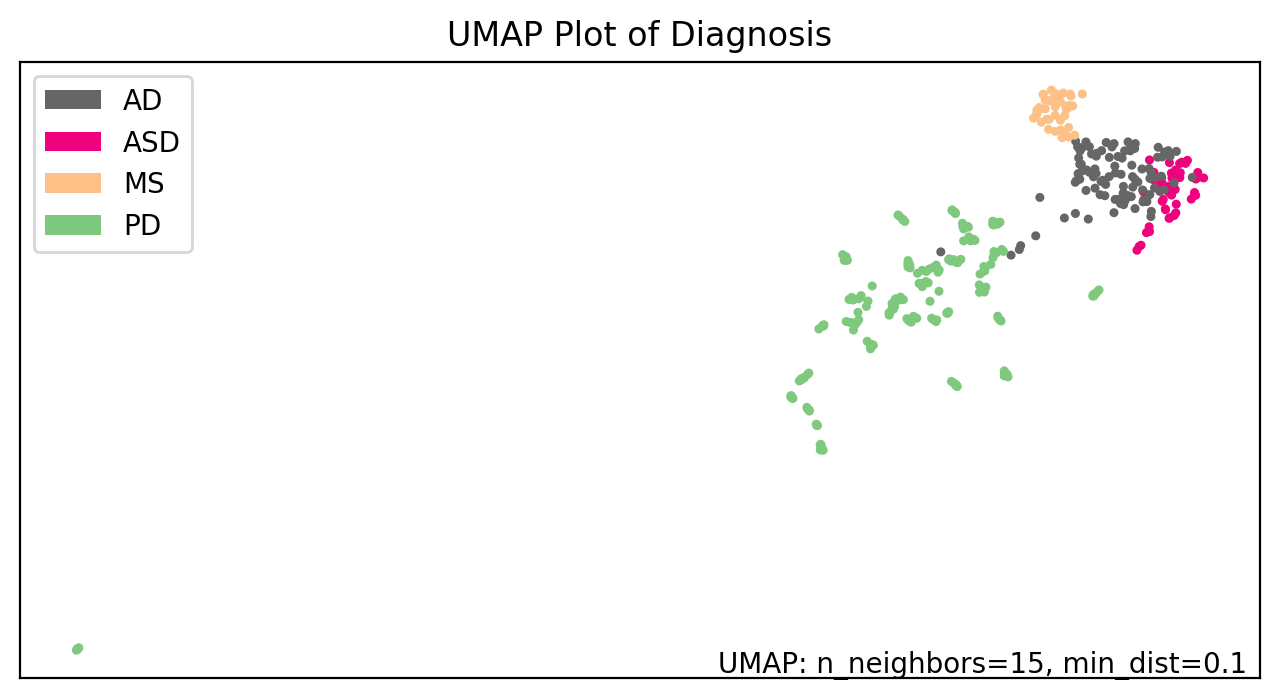

In [112]:
# Create a new figure and axes with specified size
fig, ax = plt.subplots(figsize=(8, 4), dpi=200);  # Adjust dimensions as needed

# Plotting the UMAP points
umap.plot.points(mapper, labels=relative_abundances.Diagnosis, ax=ax, color_key_cmap="Accent_r");
plt.title("UMAP Plot of Diagnosis", fontsize=12);

# Saving the figure
plt.savefig("../Figures/umap_diagnosis.svg")

Let's see how/if our plot changes if we delete all the unknowns and all the unclassified entries, as they only appear in the Parkinson's dataset.

In [6]:
# New df without unknowns and unclassifieds
new_RA_df = relative_abundances.drop([
    'unclassified_Coriobacteriaceae',
    'unclassified_Burkholderiales',
    'unclassified_Clostridiaceae',
    'unclassified_Clostridiales',
    'unclassified_Clostridiales_Family_XIII._Incertae_Sedis',
    'unclassified_Coriobacteriaceae',
    'unclassified_Enterobacteriaceae',
    'unclassified_Erysipelotrichaceae',
    'unclassified_Lachnospiraceae',
    'unclassified_Peptostreptococcaceae',
    'unclassified_Ruminococcaceae',
    'unclassified_Sutterellaceae'], axis=1)

# Check out dimensions
print("Original DataFrame Shape:" + str(relative_abundances.shape))
print("New DataFrame Shape:" + str(new_RA_df.shape))

Original DataFrame Shape:(393, 167)
New DataFrame Shape:(393, 156)


We see that the rows were deleted. Let's see if/how our plot changes.

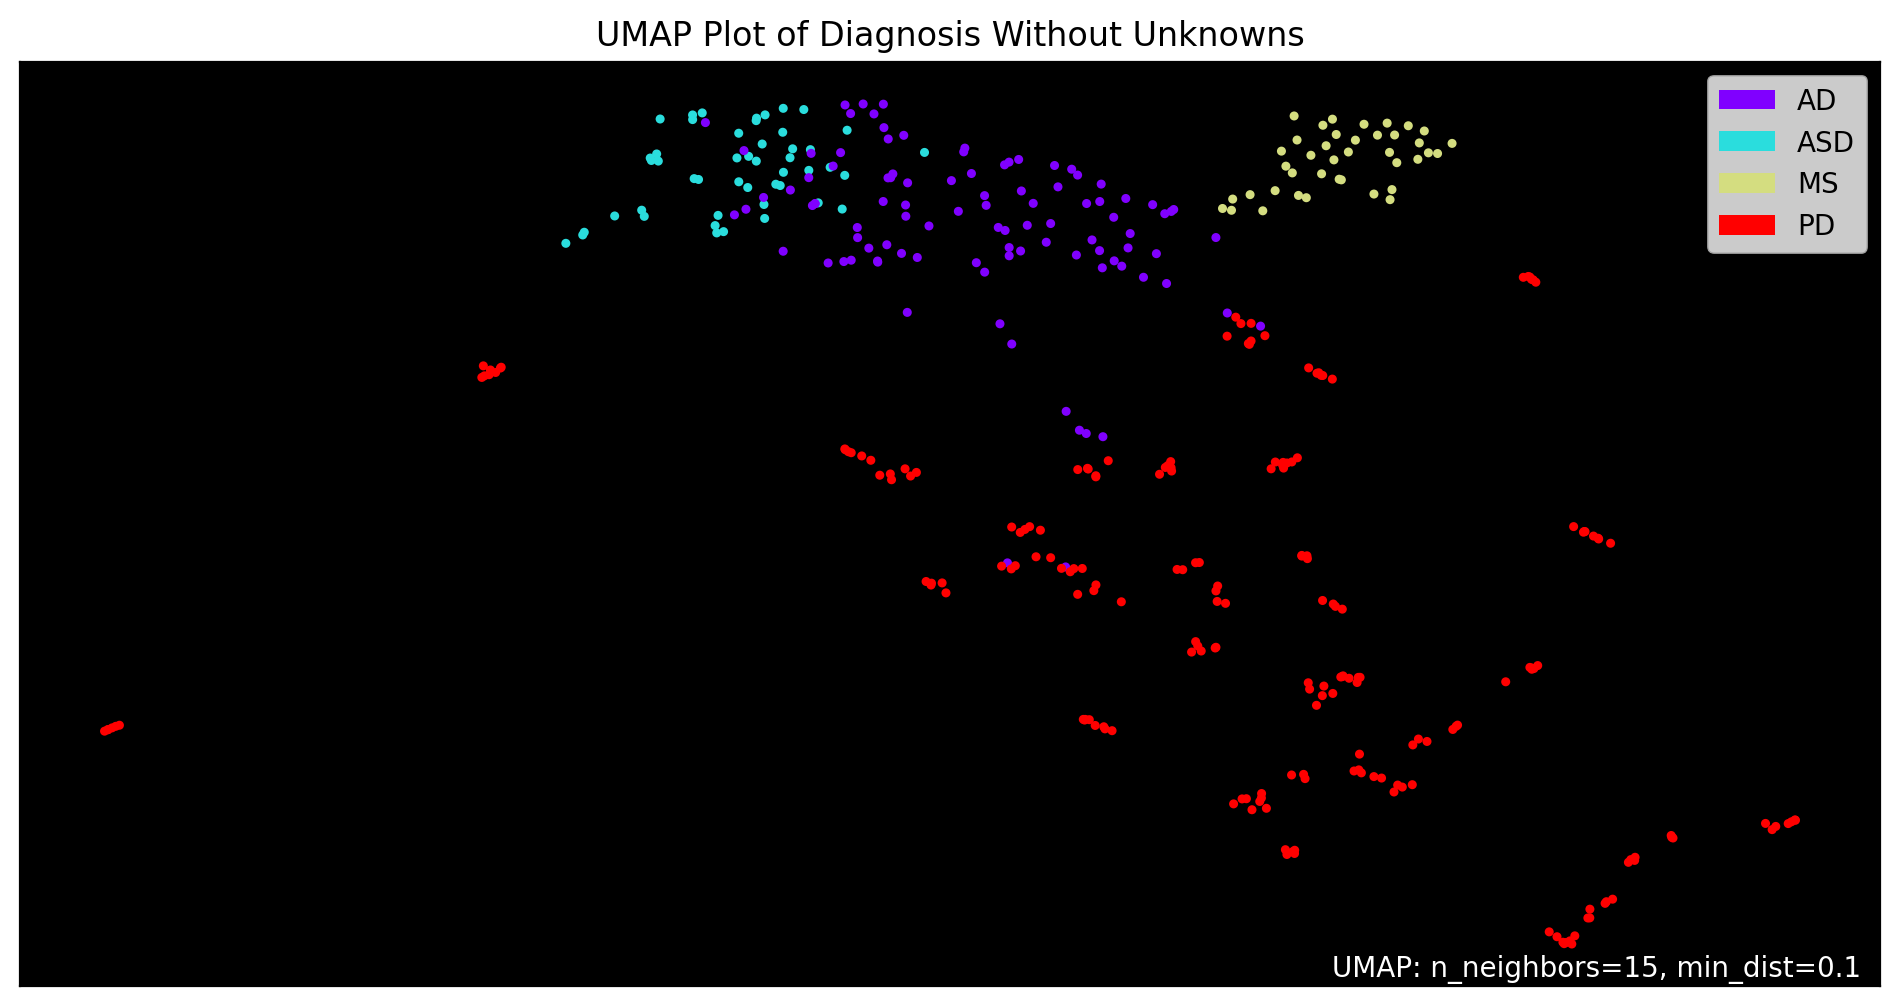

In [7]:
# Get measurement data
new_measurements = list(new_RA_df.columns)
new_measurements.remove("Diagnosis")
new_data = new_RA_df[
        new_measurements
].values

# Get z-scores
new_scaled_data = StandardScaler().fit_transform(new_data)

# Initialize new UMAP object
new_mapper = umap.UMAP(min_dist=0.1)

# Use fit_transform to get new reduced data
new_embedding = new_mapper.fit_transform(new_scaled_data)

# Create a new figure and axes with specified size
fig_new, ax_new = plt.subplots(figsize=(12, 6), dpi=200);  # Adjust dimensions as needed

# Plotting the UMAP points
umap.plot.points(new_mapper, labels=new_RA_df.Diagnosis, theme="fire", ax=ax_new);
plt.title("UMAP Plot of Diagnosis Without Unknowns", fontsize=12);

# Saving the figure
plt.savefig("../Figures/umap_diagnosis_wo_unknowns.svg")